In [13]:
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt


In [14]:
def load_images(filename):
    with gzip.open(filename, 'rb') if filename.endswith('.gz') else open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        X = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
        return X / 255.0 

def load_labels(filename):
    with gzip.open(filename, 'rb') if filename.endswith('.gz') else open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        y = np.frombuffer(f.read(), dtype=np.uint8)
        return y

def one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]


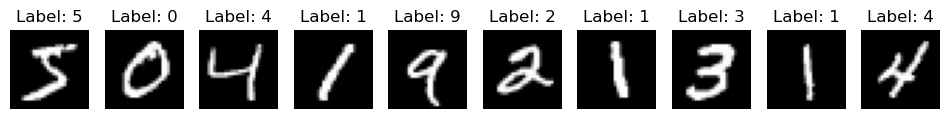

In [15]:
def visualize_samples(X, y, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {y[i]}")
        plt.axis("off")
    plt.show()

X_train = load_images("train-images-idx3-ubyte")[:5000]
y_train = load_labels("train-labels-idx1-ubyte")[:5000]
visualize_samples(X_train, y_train, n=10)


In [16]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)


In [17]:
def cross_entropy(preds, labels):
    return -np.mean(np.sum(labels * np.log(preds + 1e-9), axis=1))


In [18]:
def train_2layer(X, Y, hidden_size=128, lr=0.1, epochs=20):
    N, D = X.shape      # N = samples, D = 784
    C = Y.shape[1]      # C = 10 classes

    # Initialize weights
    W1 = np.random.randn(D, hidden_size) * np.sqrt(2. / D)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, C) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, C))

    losses = []
    accuracies = []
    W1_history = []
    W2_history=[]

    for epoch in range(epochs):
        # ----- FORWARD PASS -----
        z1 = X @ W1 + b1            # (N, hidden_size)
        a1 = relu(z1)               # ReLU activation
        z2 = a1 @ W2 + b2           # (N, C)
        probs = softmax(z2)         # Softmax output

        # Loss
        loss = cross_entropy(probs, Y)
        losses.append(loss)

        # Accuracy
        acc = np.mean(np.argmax(probs, axis=1) == np.argmax(Y, axis=1))
        accuracies.append(acc)

        # ----- BACKPROPAGATION -----
        dz2 = (probs - Y) / N       # (N, C)
        dW2 = a1.T @ dz2            # (hidden_size, C)
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2 @ W2.T            # (N, hidden_size)
        dz1 = da1 * relu_derivative(z1)
        dW1 = X.T @ dz1             # (D, hidden_size)
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # ----- PARAMETER UPDATES -----
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        W1_history.append(W1.copy())

        print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {acc*100:.2f}%")

    return W1, b1, W2, b2, losses, accuracies,W1_history,W2_history


In [19]:
Y_train = one_hot(y_train)
W1, b1, W2, b2, losses, accuracies,W1_history ,W2_history= train_2layer(
    X_train, Y_train, hidden_size=128, lr=0.1, epochs=1000
)



Epoch 1/1000 | Loss: 2.4257 | Accuracy: 11.22%
Epoch 2/1000 | Loss: 2.2748 | Accuracy: 16.30%
Epoch 3/1000 | Loss: 2.1629 | Accuracy: 24.94%
Epoch 4/1000 | Loss: 2.0662 | Accuracy: 35.10%
Epoch 5/1000 | Loss: 1.9776 | Accuracy: 44.12%
Epoch 6/1000 | Loss: 1.8943 | Accuracy: 50.86%
Epoch 7/1000 | Loss: 1.8151 | Accuracy: 55.72%
Epoch 8/1000 | Loss: 1.7397 | Accuracy: 59.48%
Epoch 9/1000 | Loss: 1.6678 | Accuracy: 62.50%
Epoch 10/1000 | Loss: 1.5997 | Accuracy: 65.14%
Epoch 11/1000 | Loss: 1.5356 | Accuracy: 67.20%
Epoch 12/1000 | Loss: 1.4751 | Accuracy: 69.04%
Epoch 13/1000 | Loss: 1.4183 | Accuracy: 70.14%
Epoch 14/1000 | Loss: 1.3649 | Accuracy: 71.48%
Epoch 15/1000 | Loss: 1.3147 | Accuracy: 72.62%
Epoch 16/1000 | Loss: 1.2677 | Accuracy: 73.34%
Epoch 17/1000 | Loss: 1.2235 | Accuracy: 74.58%
Epoch 18/1000 | Loss: 1.1821 | Accuracy: 75.34%
Epoch 19/1000 | Loss: 1.1432 | Accuracy: 76.02%
Epoch 20/1000 | Loss: 1.1068 | Accuracy: 77.26%
Epoch 21/1000 | Loss: 1.0727 | Accuracy: 77.84%
E

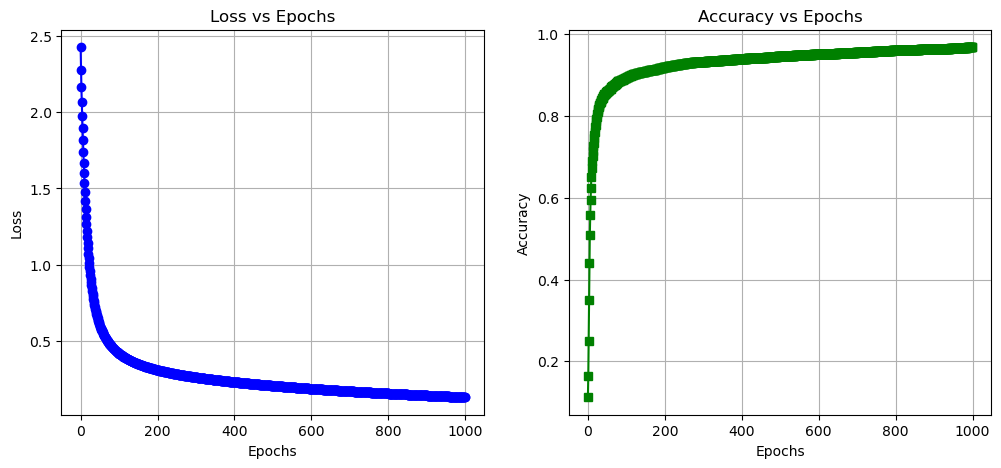

In [20]:
def plot_training(losses, accuracies):
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(losses, marker='o', color='blue')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, marker='s', color='green')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.show()

plot_training(losses, accuracies)


In [21]:
X_test = load_images("t10k-images-idx3-ubyte")[:500]
y_test = load_labels("t10k-labels-idx1-ubyte")[:500]
Y_test = one_hot(y_test)

# Forward pass on test data
z1 = X_test @ W1 + b1
a1 = relu(z1)
z2 = a1 @ W2 + b2
probs_test = softmax(z2)
y_pred = np.argmax(probs_test, axis=1)

test_acc = np.mean(y_pred == y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 92.40%


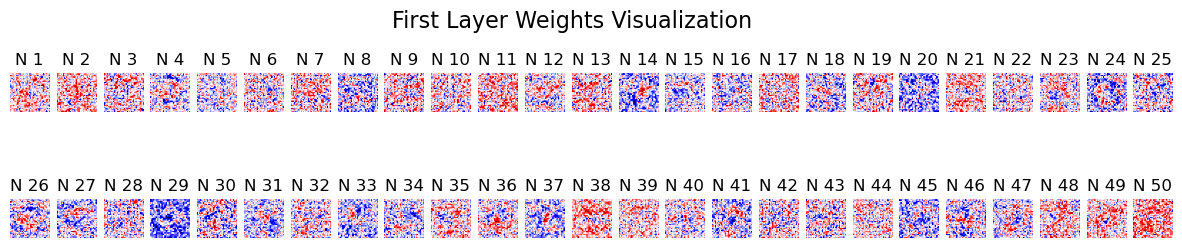

In [22]:
def visualize_weights(W1, n=20):

    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(W1[:, i].reshape(28, 28), cmap="seismic")
        plt.title(f"N {i+1}")
        plt.axis("off")
    plt.suptitle("First Layer Weights Visualization", fontsize=16)
    plt.show()

visualize_weights(W1, n=50)


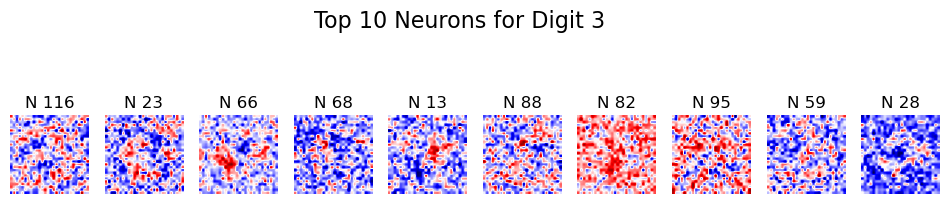

In [23]:
def visualize_top_neurons(W1, W2, digit=3, top_n=10):
    importance = np.abs(W2[:, digit])
    top_indices = np.argsort(-importance)[:top_n]

    plt.figure(figsize=(12, 3))
    for i, idx in enumerate(top_indices):
        plt.subplot(1, top_n, i + 1)
        plt.imshow(W1[:, idx].reshape(28, 28), cmap="seismic")
        plt.title(f"N {idx}")
        plt.axis("off")
    plt.suptitle(f"Top {top_n} Neurons for Digit {digit}", fontsize=16)
    plt.show()

visualize_top_neurons(W1, W2, digit=3, top_n=10)


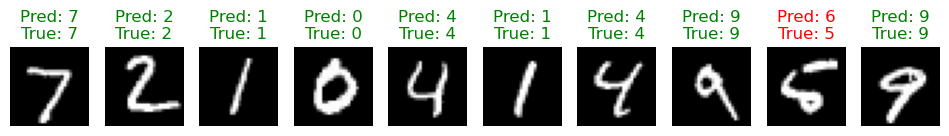

In [24]:
def visualize_predictions(X, y_true, y_pred, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap="gray")
        color = "green" if y_true[i] == y_pred[i] else "red"
        plt.title(f"Pred: {y_pred[i]}\nTrue: {y_true[i]}", color=color)
        plt.axis("off")
    plt.show()

visualize_predictions(X_test, y_test, y_pred, n=10)
